# Exploratory data analysis


## Approach and contents:

In depth EDA of all the datasets to understand the features/ attributes, distribution of data, anamolies, outliers and inconsistencies present. The EDA also aims at finding the relations between these attributes which in turn will help in identifying the data generated through the business rules. 

I will not be doing any corrections in this code and rather try to understand the variables, KPI and the behaviour of the dataset to form a generalised approach to treat the datasets. It is only exploratory analysis to observe the patterns. It will be used to implement the effective strategy to handle / correct the data.


Summary of the approach followed in this notebook:

A. 6Ps Data.xlsx
1. Preliminary analysis and sanity check
   a) Check for duplicates
   b) Check for data types - To see if numerical variables have only numerical data and vice versa
   c) Check for samples with all the numerical variables are null
   d) Check for missing values
   e) Imputation of missing values
2. Descriptive statistics
   a) Descriptive statistic for the overall ataset
   b) By category, measure, region and KPI
   c) Analysing range, standard deviation and means
3. Visualizations
   a) Univariate analysis
   b) Bivariate analysis
   c) Multivariate analysis by categories
   d) Analysis of select brands and KPIs
   e) Visualising the outliers
4. Inferential statistics and tests
5. Clustering and segmentation within the dataset
6. Conclusion and hypothesis of further approach

B. Penetration.xlsx
1. Sanity checks
2. Descriptive statistics
3. Inderential statistics
4. Visualisations
5. Conclusion

C. Nielsen NL
1. Sanity checks
2. Descriptive statistics
3. Inderential statistics
4. Visualisations
5. Conclusion

D. Nielsen UK
1. Sanity checks
2. Descriptive statistics
3. Inderential statistics
4. Visualisations
5. Conclusion

E. Finance
1. Sanity checks
2. Descriptive statistics
3. Inderential statistics
4. Visualisations
5. Conclusion

In [202]:
# Numerical and data manipulation packages
import numpy as np
import pandas as pd

# Math operations
from scipy import stats

# HTML for chart headings an formats
from IPython.display import display, HTML, SVG
def show_html(astr): return display(HTML('<center>{}</center>'.format(astr)))

# Visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plotly
%matplotlib inline

# Preprocessing and Clustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ignore the unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Set universal format for the notebook
pd.options.display.float_format = '{:.2f}'.format

In [252]:
# Read the primary dataset

sixp_df = pd.read_excel('6Ps Data.xlsx')

In [283]:
# Read other datasets

finance_df = pd.read_excel('Finance.xlsx')
nielsen_NL = pd.read_excel('Nielsen Market Netherlands 2019 MAT Report_modified.xlsx')
nielsen_UK_Deo = pd.read_excel('Nielsen Market UK Deodorants_modified.xlsx')
penetration = pd.read_excel('Penetration Data.xlsx')

## 1. EDA for 6Ps Data.xlsx

In [253]:
# Removing the duplicate records
print("The records in 6Ps Data file are: ",sixp_df.shape)

sixp_df.drop_duplicates(subset=None, keep='first', inplace=True)
print("The records after removing duplicates are: ", sixp_df.shape)

The records in 6Ps Data file are:  (374303, 32)
The records after removing duplicates are:  (226035, 32)


#### Duplicates:

The dataset has duplicates. The records where all the items were duplicated are removed.

In [4]:
# Check for the data types, number of records, type of data and null
sixp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226035 entries, 0 to 373396
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Data Source          226035 non-null  object 
 1   Freq of Delivery     226035 non-null  object 
 2   Region               226035 non-null  object 
 3   COUNTRY              226035 non-null  object 
 4   Category Group       222637 non-null  object 
 5   Category             222615 non-null  object 
 6   Market               222637 non-null  object 
 7   Sector               226035 non-null  object 
 8   Category Gender      82736 non-null   object 
 9   Sector/Variance      224060 non-null  object 
 10  GMI Level            198176 non-null  float64
 11  UL / Comp            226035 non-null  object 
 12  Global Manufacturer  226035 non-null  object 
 13  Global Brand         225486 non-null  object 
 14  Local Brand          225955 non-null  object 
 15  Measure / KPI    

#### Comments: 

First 22 columns (incluing GMI leveL which takes the descrete values between 4 to 8) are categorical while rest 10 columns are numerical data.

In [5]:
# Check for the null/missing values
sixp_df.isna().sum()

Data Source                 0
Freq of Delivery            0
Region                      0
COUNTRY                     0
Category Group           3398
Category                 3420
Market                   3398
Sector                      0
Category Gender        143299
Sector/Variance          1975
GMI Level               27859
UL / Comp                   0
Global Manufacturer         0
Global Brand              549
Local Brand                80
Measure / KPI               0
Primary Key                 0
6P                          0
Source                      0
Supplier                  131
Measure Type            54663
Measure Category       125353
Last 12W-2                  0
Last 12W-1                  0
L12W-1 Significance     52913
Last 12W                    0
L12W Significance       50161
MAT-2                       0
MAT-1                       0
MAT-1 Significance      70808
MAT                         0
MAT Significance        65653
dtype: int64

#### Missing values:

1. Null values are present.

2. Based on the historical relations, the missing values for some of the variables might be imputed. 
   e.g. Market, Category Group and Category; Measures / KPI and Measure Type; Global and Local Brand etc.

3. Category Gender can be imputed either base on historical data for a particular product category or can 
   be deemed as Unisex if the product is not targeted for any particular sex.

4. Records with all the numerical column as null or 0 will be removed.

In [256]:
# Extractin numerical solumns for further analysis
sixp_df_num = sixp_df.iloc[:,-10:]
sixp_df_num.head()

,Last 12W-2,Last 12W-1,L12W-1 Significance,Last 12W,L12W Significance,MAT-2,MAT-1,MAT-1 Significance,MAT,MAT Significance
0,298.00,263.00,-1.00,58.20,-1.00,26.10,12.00,-1.00,27.00,1.00
1,204.60,116.40,-1.00,-160.80,-1.00,87.60,2.70,-1.00,22.80,1.00
2,35.40,27.60,-1.00,56.20,1.00,16.80,12.00,-1.00,30.00,1.00
3,1.80,1.80,0.00,1.20,0.00,0.00,0.30,0.00,1.50,0.00
4,192.80,272.60,1.00,110.80,-1.00,22.80,13.50,-1.00,37.80,1.00


### Diagnosis and Imputation of missing values

### 1. Missing values for all the numerical columns

In [154]:
# Sanity Check 1: If the numerical columns contains any string

sixp_df_num.head()
num_cols = sixp_df_num.columns
num_cols

for i in num_cols:
    a = sixp_df[i]

    try:
        a*1.0
    except Exception:
        print(i, ": Contains string or unwanted input in numerical data at")

In [157]:
# If all the numericals columns are 0 or null, delete the record

# All null values
sixp_df = sixp_df.dropna(how='all', subset=num_cols)
sixp_df.shape

# We will not remove records with all 0 as for some of the KPI's 0 is meaningful.

(226035, 32)

### 2. Category Gender

####  Preliminary observations:

Can be either male or female depending upon the target customer demographics. The brands which are not targeted towards any particular gender have Category Gender as null. 

Instead of null, we will replace these with 'Unisex'.

In [23]:
# Replacing nulls with Unisex category Gender
sixp_df['Category Gender'].fillna("Unisex", inplace=True)
sixp_df.isna().sum()

Data Source                 0
Freq of Delivery            0
Region                      0
COUNTRY                     0
Category Group           3398
Category                 3420
Market                   3398
Sector                      0
Category Gender             0
Sector/Variance          1975
GMI Level               27859
UL / Comp                   0
Global Manufacturer         0
Global Brand              549
Local Brand                80
Measure / KPI               0
Primary Key                 0
6P                          0
Source                      0
Supplier                  131
Measure Type            54663
Measure Category       125353
Last 12W-2                  0
Last 12W-1                  0
L12W-1 Significance     52913
Last 12W                    0
L12W Significance       50161
MAT-2                       0
MAT-1                       0
MAT-1 Significance      70808
MAT                         0
MAT Significance        65653
dtype: int64

### 3. Category Group, Category and Market

####  We will identify the sector/ products for which the Category Group, Category and Market are not available. 

In [28]:
# Extract these feature in temporary dataframe
cat = sixp_df[['Category Group', 'Category', 'Market', 'Sector', 'Global Brand', 'Local Brand']]
cat.head()

,Category Group,Category,Market,Sector,Global Brand,Local Brand
0,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,Rexona,Rexona
1,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,Rexona,Rexona
2,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,Rexona,Rexona Men
3,BPC,Deodorants & Fragrances,Deodorants,Deo Aerosols,Rexona,Rexona Men
4,BPC,Deodorants & Fragrances,Deodorants,Deo Roll-Ons,Rexona,Rexona


In [30]:
# Observations where the category is Null
null_cat = cat[cat['Category Group'].isna()]
null_cat['Sector'].unique()

array(['Bar Soaps', 'Bath Additives (+1 more)', 'Body Washes',
       'Grains & Rice Dishes-Shelf Stable', 'Scrubs & Polishes'],
      dtype=object)

#### For the following categories, the category group, category and markets are not available. 
    1. Bar Soaps
    2. Bath Additives (+1 more)
    3. Body Washes
    4. Grains & Rice Dishes-Shelf stable
    5. Scrubs & Polishes
    
We will replace these nulls with not available.

In [167]:
# Replacing null Category with 'Not Available'
sixp_df['Category Group'].fillna("Not Available", inplace=True)

# Replacing null Market with 'Not Available'
sixp_df['Market'].fillna("Not Available", inplace=True)
sixp_df.isna().sum()

Data Source                0
Freq of Delivery           0
Region                     0
COUNTRY                    0
Category Group             0
Category                  15
Market                     0
Sector                     0
Category Gender            0
Sector/Variance            0
GMI Level               9371
UL / Comp                  0
Global Manufacturer        0
Global Brand              51
Local Brand                0
Measure / KPI              0
Primary Key                0
6P                         0
Source                     0
Supplier                 131
Measure Type           25498
Measure Category       51677
Last 12W-2                 0
Last 12W-1                 0
L12W-1 Significance    20599
Last 12W                   0
L12W Significance      28052
MAT-2                      0
MAT-1                      0
MAT-1 Significance     20679
MAT                        0
MAT Significance       20696
dtype: int64

### 4. Measure Type

Lets find out and report the KPIs for which we do not have measure type and measure category.

In [186]:
KPI = sixp_df['Measure / KPI'].unique()
print("Measures / KPI are:")
print(list(KPI))

Measures / KPI are:
['Ad Spend', 'Promo Spend', 'Loyalty', 'Penetration', 'Repeat Rate', 'Spend per buyer', 'Frequency', 'Attractive Pack Attribute', 'Total Brand Com. Awareness', 'Unaided Brand Awareness', 'Better Quality Attribute', 'Taste/Work Better', 'Different Index', 'Diverted', 'Meaningful Index', 'Power_Index', 'Premium Index', 'Salient Index', 'Brand Power Share', 'Tracked Ai', 'Pyramid - Relevance', '% Volume on Deal', 'Average Price Index', 'Quality Of Distribution', "RSV (€ '000)", 'S.P.P.D.', 'TDP Off Shelf', 'TDP On Shelf', 'Total Distribution Points', 'Value Market Share', 'Weighted Distribution', 'Numeric Distribution', 'Price Lt/Kg', 'Visibility Share', 'Sos/Som']


In [182]:
KPI = sixp_df['Measure / KPI'].unique()
for i in KPI:
    temp = sixp_df[sixp_df['Measure / KPI']==i]
    print(i, "has measure type as: ", temp['Measure Type'].unique())

Ad Spend has measure type as:  ['MAT Quarter vs YAG']
Promo Spend has measure type as:  ['MAT Quarter vs YAG']
Loyalty has measure type as:  ['Put People First']
Penetration has measure type as:  ['Put People First']
Repeat Rate has measure type as:  ['Put People First']
Spend per buyer has measure type as:  ['Put People First']
Frequency has measure type as:  ['Put People First']
Attractive Pack Attribute has measure type as:  ['Unlock the Magic']
Total Brand Com. Awareness has measure type as:  ['Unlock the Magic']
Unaided Brand Awareness has measure type as:  ['Build Brand Love']
Better Quality Attribute has measure type as:  ['Unlock the Magic']
Taste/Work Better has measure type as:  ['Build Brand Love']
Different Index has measure type as:  ['Build Brand Love']
Diverted has measure type as:  ['Build Brand Love']
Meaningful Index has measure type as:  ['Build Brand Love']
Power_Index has measure type as:  ['Build Brand Love']
Premium Index has measure type as:  ['Build Brand Love'

### Descriptive statistics

In [6]:
# Descriptive statistics
sixp_df.describe().T

,count,mean,std,min,25%,50%,75%,max
GMI Level,198176.00,5.68,0.59,4.00,5.00,6.00,6.00,8.00
Last 12W-2,226035.00,12749.83,4516667.58,-5458.40,1.00,15.20,92.40,2138284980.40
Last 12W-1,226035.00,3504.21,563765.12,-15206.60,3.80,24.60,105.40,263136526.40
L12W-1 Significance,173122.00,0.04,0.85,-1.00,-1.00,0.00,1.00,1.00
Last 12W,226035.00,38408.69,12295916.92,-4467.40,4.00,24.76,106.40,5492034209.00
L12W Significance,175874.00,-0.01,0.84,-1.00,-1.00,0.00,1.00,1.00
MAT-2,226035.00,69470.51,31937850.79,-7590.00,0.00,7.05,122.40,15180494810.40
MAT-1,226035.00,16565.71,7457823.95,-7945.20,0.00,12.30,138.00,3545667917.40
MAT-1 Significance,155227.00,-0.00,0.84,-1.00,-1.00,0.00,1.00,1.00
MAT,226035.00,4287.18,1424845.25,-5979.00,2.70,21.00,147.90,673683798.30


#### Descriptive statistics:

1. Extreme value measure for outliers:
   The values shows presence of extreme values in Last 12W-2, Last 12W-1, Last 12W, MAT-2, MAT-1 and MAT. 
   Let's perform univariate, multivariate and category wise EDA on these variables.
   
2. Based on the descriptive statistics, significance variables shows no anamolies. 

In [47]:
# Average value by KPI
a = sixp_df.groupby(['Measure / KPI']).mean()
a.iloc[:,-10:]

,Last 12W-2,Last 12W-1,L12W-1 Significance,Last 12W,L12W Significance,MAT-2,MAT-1,MAT-1 Significance,MAT,MAT Significance
Measure / KPI,,,,,,,,,,
% Volume on Deal,380.05,415.25,0.04,364.90,-0.01,565.73,560.93,-0.05,549.03,-0.03
Ad Spend,993.51,1010.72,-0.08,999.43,-0.08,363.82,354.13,-0.03,373.90,0.02
Attractive Pack Attribute,34.08,37.11,-0.02,38.49,0.02,21.45,25.71,-0.05,57.03,0.07
Attribute 1,34.07,35.56,-0.03,34.97,-0.04,18.18,22.45,-0.02,50.54,-0.01
Attribute 2,34.11,36.02,-0.05,35.94,-0.05,19.61,22.17,-0.02,51.34,-0.01
Average Price Index,245.93,244.93,-0.09,13705.98,-0.08,357.76,359.06,-0.06,358.84,-0.09
Better Quality Attribute,39.90,44.65,0.02,45.59,-0.04,24.46,30.30,0.06,67.36,0.01
Brand Power Share,14.37,16.47,-0.00,17.02,-0.02,21.55,24.70,-0.00,25.54,-0.02
Different Index,153.09,180.22,nan,190.55,nan,229.63,270.33,nan,285.82,nan


In [48]:
# Standard deviation by KPI
a = sixp_df.groupby(['Measure / KPI']).std()
a.iloc[:,-10:]

,Last 12W-2,Last 12W-1,L12W-1 Significance,Last 12W,L12W Significance,MAT-2,MAT-1,MAT-1 Significance,MAT,MAT Significance
Measure / KPI,,,,,,,,,,
% Volume on Deal,2166.92,2338.18,1.00,2141.09,0.99,3247.35,3302.68,0.99,3265.72,0.99
Ad Spend,4805.53,5028.73,0.77,4987.60,0.76,1913.81,1999.23,0.78,2090.10,0.77
Attractive Pack Attribute,37.80,37.40,0.58,36.74,0.60,44.60,46.78,0.50,56.17,0.51
Attribute 1,22.40,20.00,0.31,19.87,0.33,29.84,30.99,0.13,30.41,0.20
Attribute 2,22.72,20.71,0.33,19.52,0.37,31.66,31.54,0.17,30.94,0.19
Average Price Index,268.52,235.77,0.87,934922.56,0.88,377.94,349.69,0.88,368.92,0.88
Better Quality Attribute,42.21,42.09,0.59,41.17,0.56,50.15,54.20,0.50,62.83,0.51
Brand Power Share,15.15,14.62,0.60,14.14,0.62,22.72,21.93,0.60,21.21,0.62
Different Index,98.86,79.26,nan,64.73,nan,148.29,118.90,nan,97.09,nan


### Viasualising univariate distributions

We will visualise the distributions of these variables. This will help us in understanding the extent of outliers and if we should remove these outliers.
Also, we will understand if the data is normally distributed.

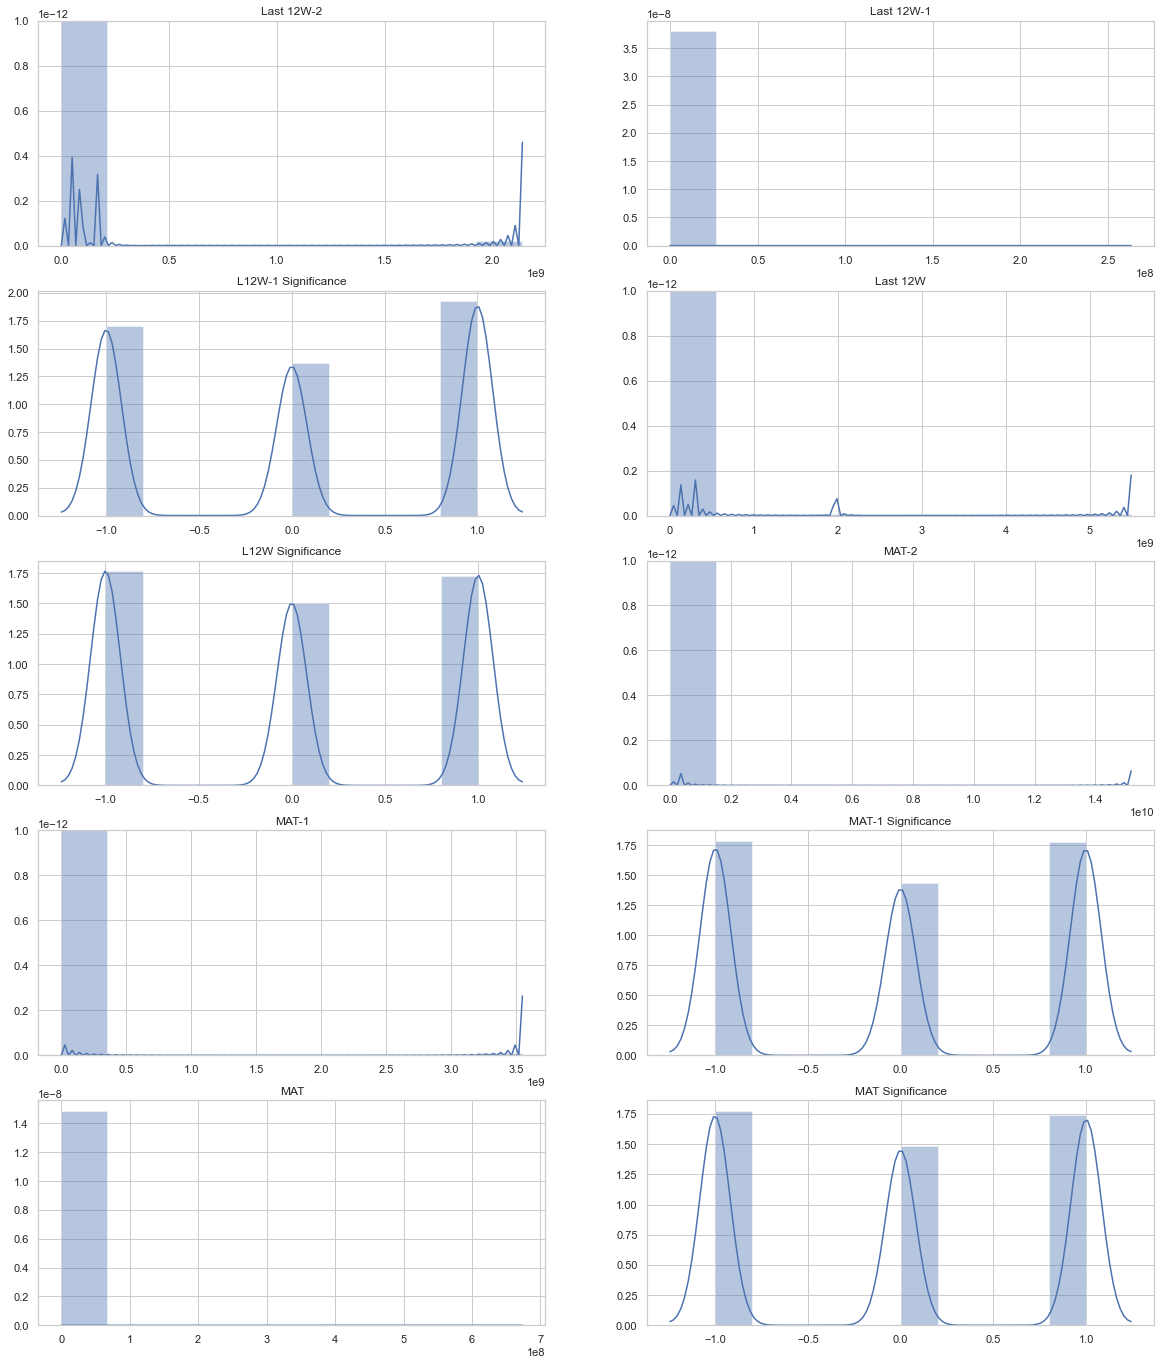

In [10]:
sns.set(style="whitegrid")

cols = sixp_df_num.columns

fig = plt.figure(figsize=(20,24))

for i in range(sixp_df_num.shape[1]):
    ax = fig.add_subplot(5, 2, i+1)
    ax = sns.distplot(sixp_df_num.iloc[:,i:i+1], bins=10, kde=True)
    ax.set(title=cols[i])
    
plt.show()

#### Histograms and Kernel density estimations:

1. Significance is a descrete variable which takes values as (-1, 0, 1) and is generated based on period 
   over period change. It is 1 if the change in two consecutive period is positive, -1 if negative and 0 
   if unchanged.
2. Rest of the variables have extreme outliers on right tail. 
3. There is some density at extreme right tail, probably one of the measure takes very large values. Lets analyse this behaviour further through violin charts.
4. If we remove the extreme outliers, the data will be approximately normal. We will perform a test for normality on these variables.

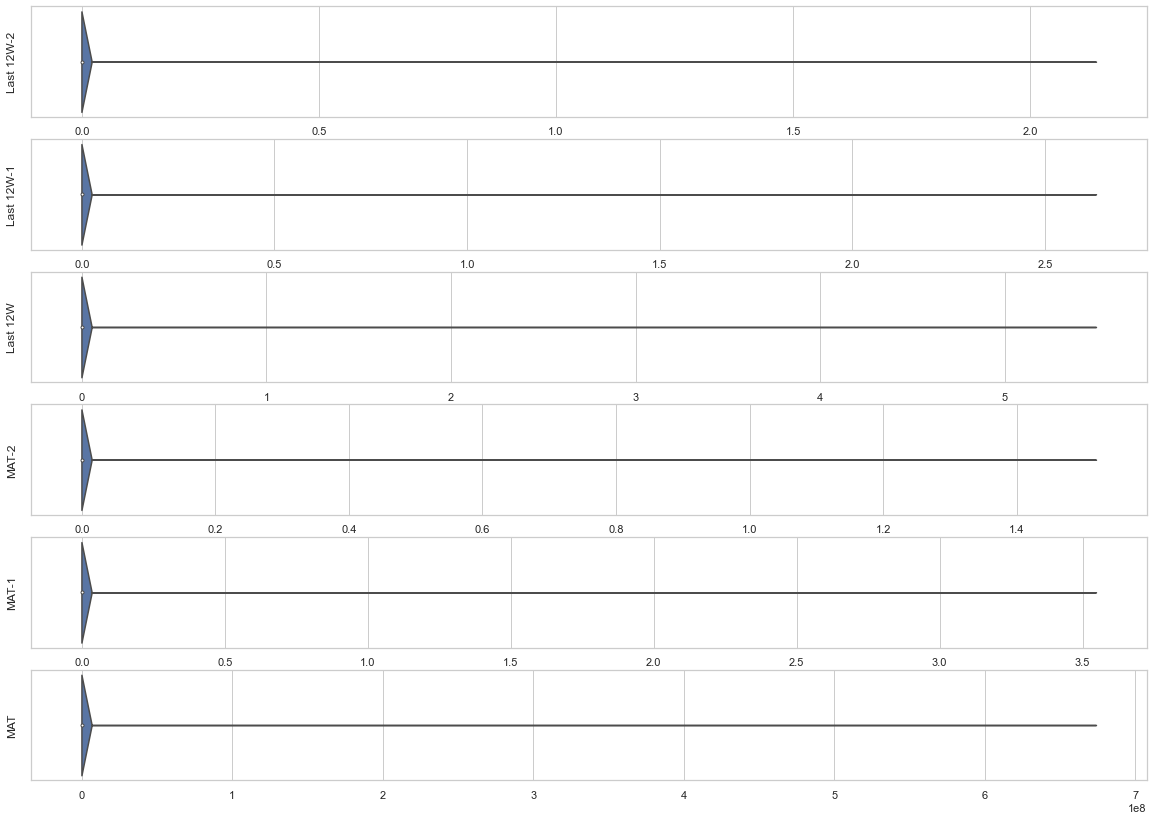

In [11]:
# Visualising the columns with outliers

sixp_df_num = sixp_df_num.drop(['L12W-1 Significance',
                               'L12W Significance',
                               'MAT-1 Significance',
                               'MAT Significance'], axis=1)

sns.set(style="whitegrid")

cols = sixp_df_num.columns

fig = plt.figure(figsize=(20,24))

for i in range(sixp_df_num.shape[1]):
    ax = fig.add_subplot(10, 1, i+1)
    ax = sns.violinplot(x=sixp_df_num.iloc[:,i:i+1])
    ax.set(ylabel=cols[i])
    
plt.show()

#### Violin chart

Similar to KDE, the violin charts also shows the outliers along with the distribution of the observations. As inferred earlier if we exclude the outliers the data would show a normal/ tweedie distribution.

Let's perform the biavariate analysis on these variables first.
Then we will visualise these variables by region, KPI, category and brand.

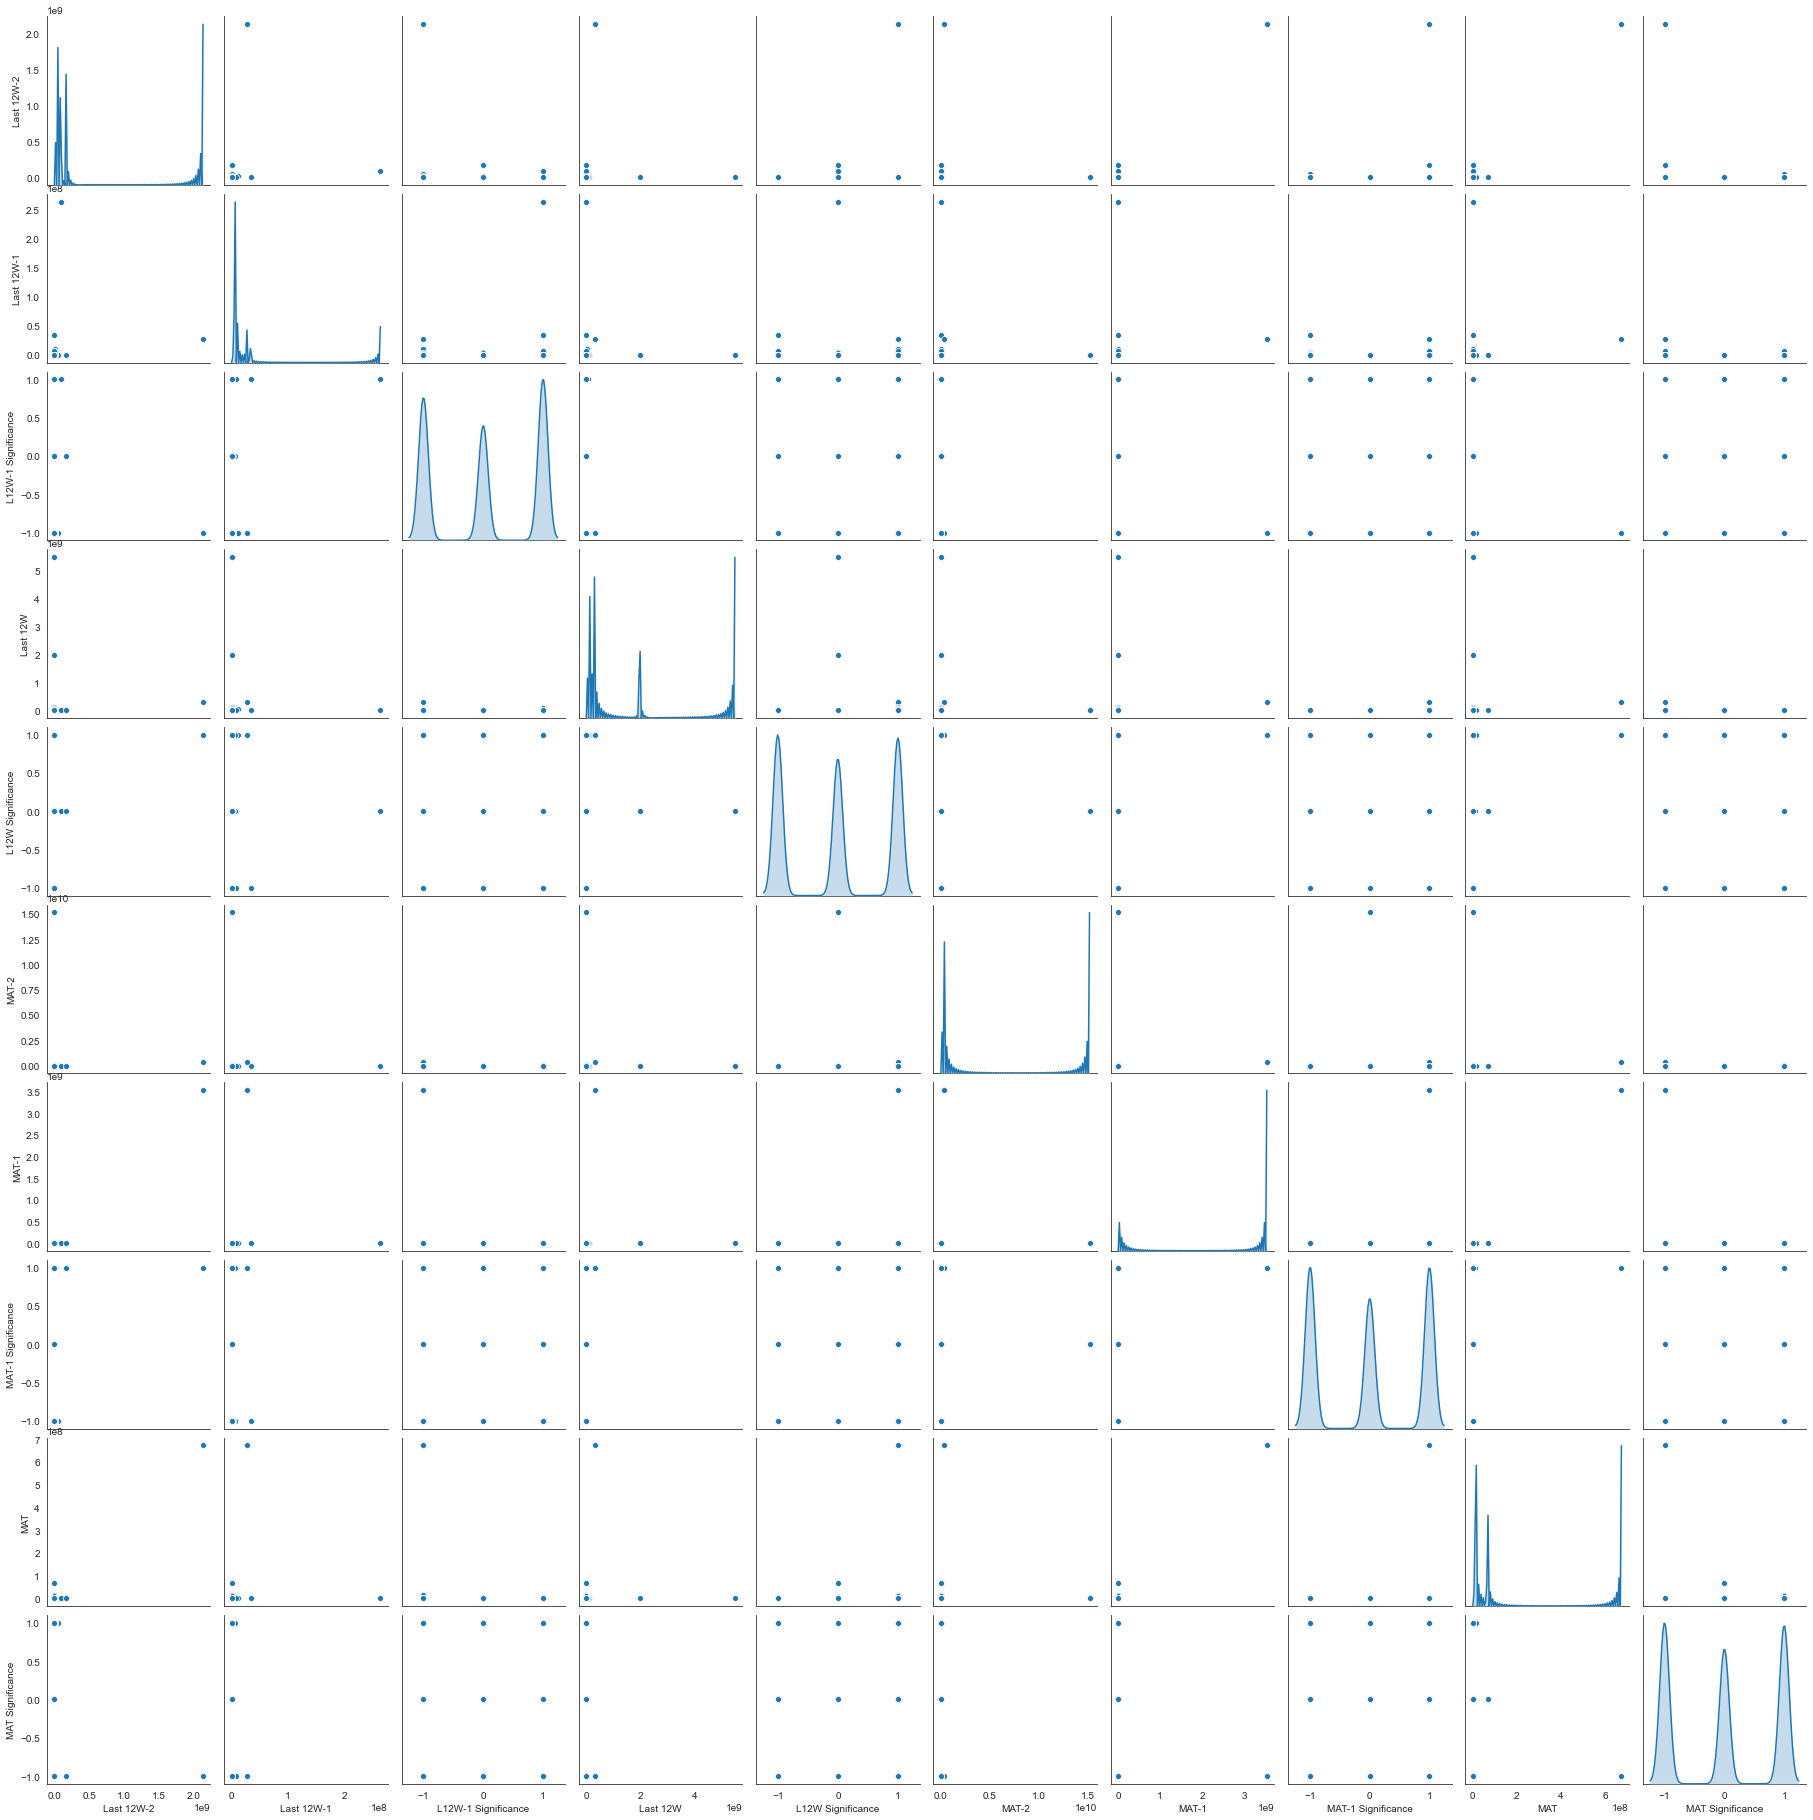

In [200]:
sns.pairplot(sixp_df_num, diag_kind='kde')

### Outlier detection

We will plot series of box plots and obtain descriptive statistics for different variables and variety of combinations.

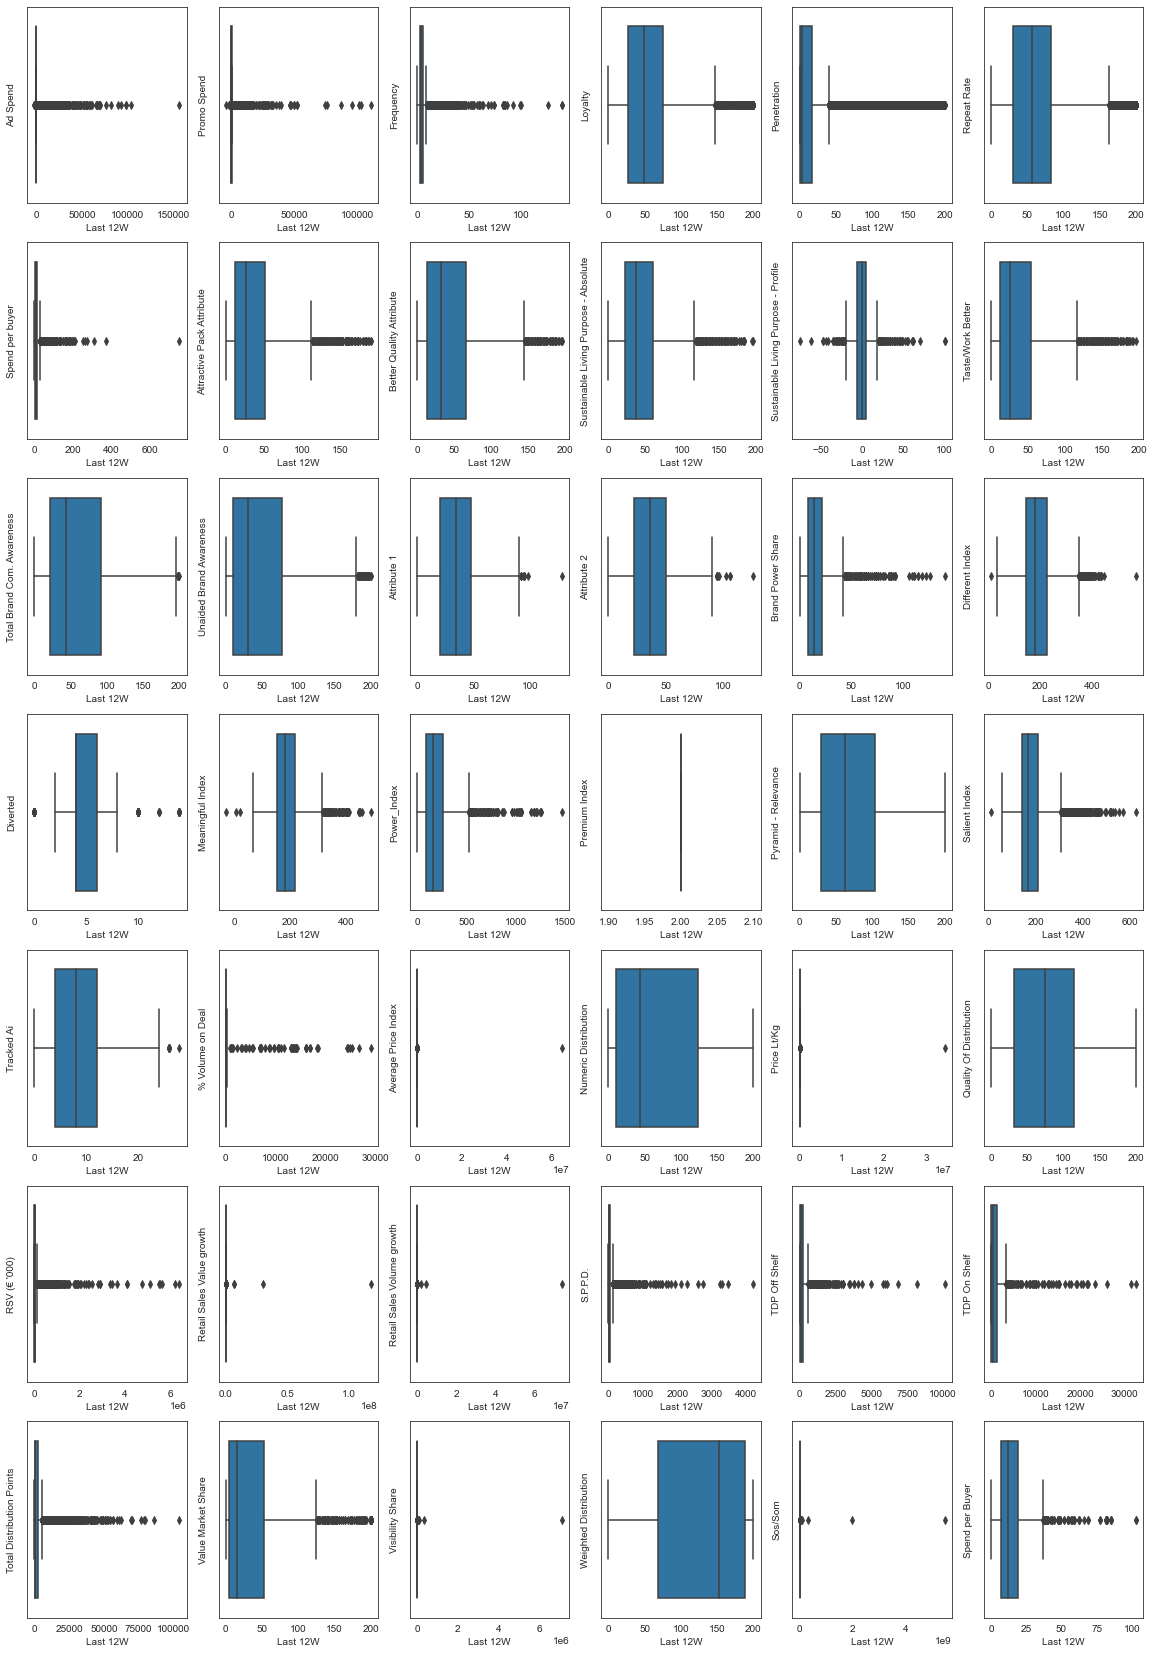

In [49]:
# Visualise each KPI through box plot

KPI = sixp_df['Measure / KPI'].unique()
fig = plt.figure(figsize=(20,60))
n = 0
for i in KPI:
    temp = sixp_df[sixp_df['Measure / KPI']== i]
    ax = fig.add_subplot(14, 6, n+1)
    ax = sns.boxplot(temp['Last 12W'])
    ax.set(ylabel=i)
    n+=1

It is clearly visible from the box plots that the following KPIs exhibit a lot of noise in the data.
1. Ad Spend
2. Promo Spend
3. Frequency
4. Spend per buyer
5. Premium index
6. % volume on deal
7. Average Price Index
8. Price
9. RSV
10. RSV growth (both, volume and sales growth)
11. TDP
12. Visibility share
13. Sos/SOM

Also, we have only analised the Last 12W behaviour as the distribution of all the numerical columns (Last 12W-2, MAT, etc.) are similar. So analysing one would give us a clear enough picture about the entire data.

#### Penetration

Most surprising find is, the Penetration has values from 0 to 200. It should be between 0 to 100 as the penetration cannot exceed 100%. the Penetration excel file also shows the distribution between 0 to 100.

These are clearly the incorrect values taken for the penetration and can be removed.


#### Visibility market share

Market share should also be between 0 to 100 but as we can see from above, the visibility maret share has values upto 200. 


#### TDP

To understand the extreme values for TDP we nee to analyse the category wise data. The volume for certain categories might be very large resulting in uneven distribution in the TDP values. 

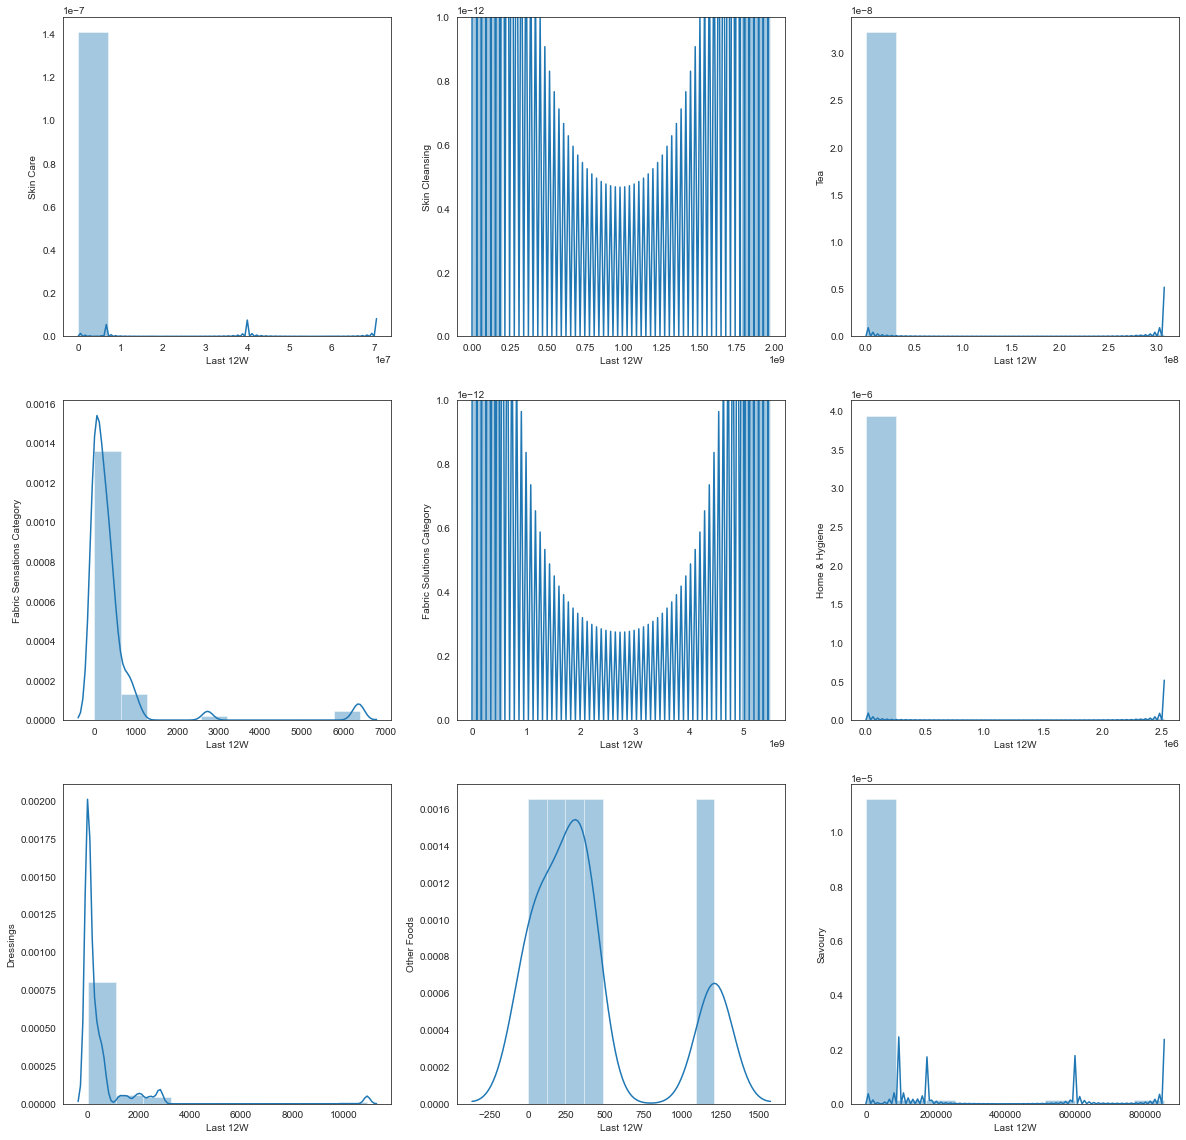

In [66]:
# Visualise each category through box plot
show_html("<h3>SOS/SOM by category</h3>")
sixp_df_sos = sixp_df[sixp_df['Measure / KPI']== 'Sos/Som']
cat = sixp_df_sos['Category'].unique()

fig = plt.figure(figsize=(20,20))
n = 0
for i in cat:
    temp = sixp_df_sos[sixp_df_sos['Category']== i]
    ax = fig.add_subplot(3, 3, n+1)
    ax = sns.distplot(temp['Last 12W'], bins=10, kde=True)
    ax.set(ylabel=i)
    n+=1

Fabric solutions and Sin Cleansing shows U-shaped distribution while other categories have multiple clusters with normally distributed data.

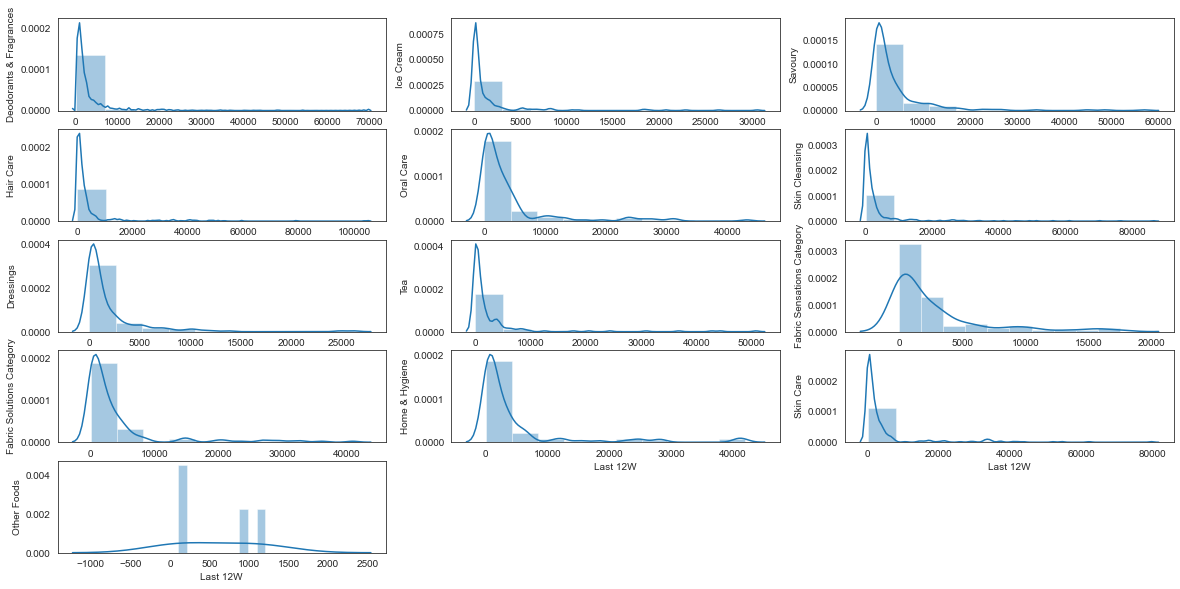

In [69]:
# Visualise each category through box plot
show_html("<h3>TDP by category</h3>")
sixp_df_sos = sixp_df[sixp_df['Measure / KPI']== 'Total Distribution Points']
cat = sixp_df_sos['Category'].unique()

fig = plt.figure(figsize=(20,20))
n = 0
for i in cat:
    temp = sixp_df_sos[sixp_df_sos['Category']== i]
    ax = fig.add_subplot(10, 3, n+1)
    ax = sns.distplot(temp['Last 12W'], bins=10, kde=True)
    ax.set(ylabel=i)
    n+=1

Total Distribution points follows the normal distribution with long right tails. TDP on shelf and TDP off shelf should follow the exact same behaviour.

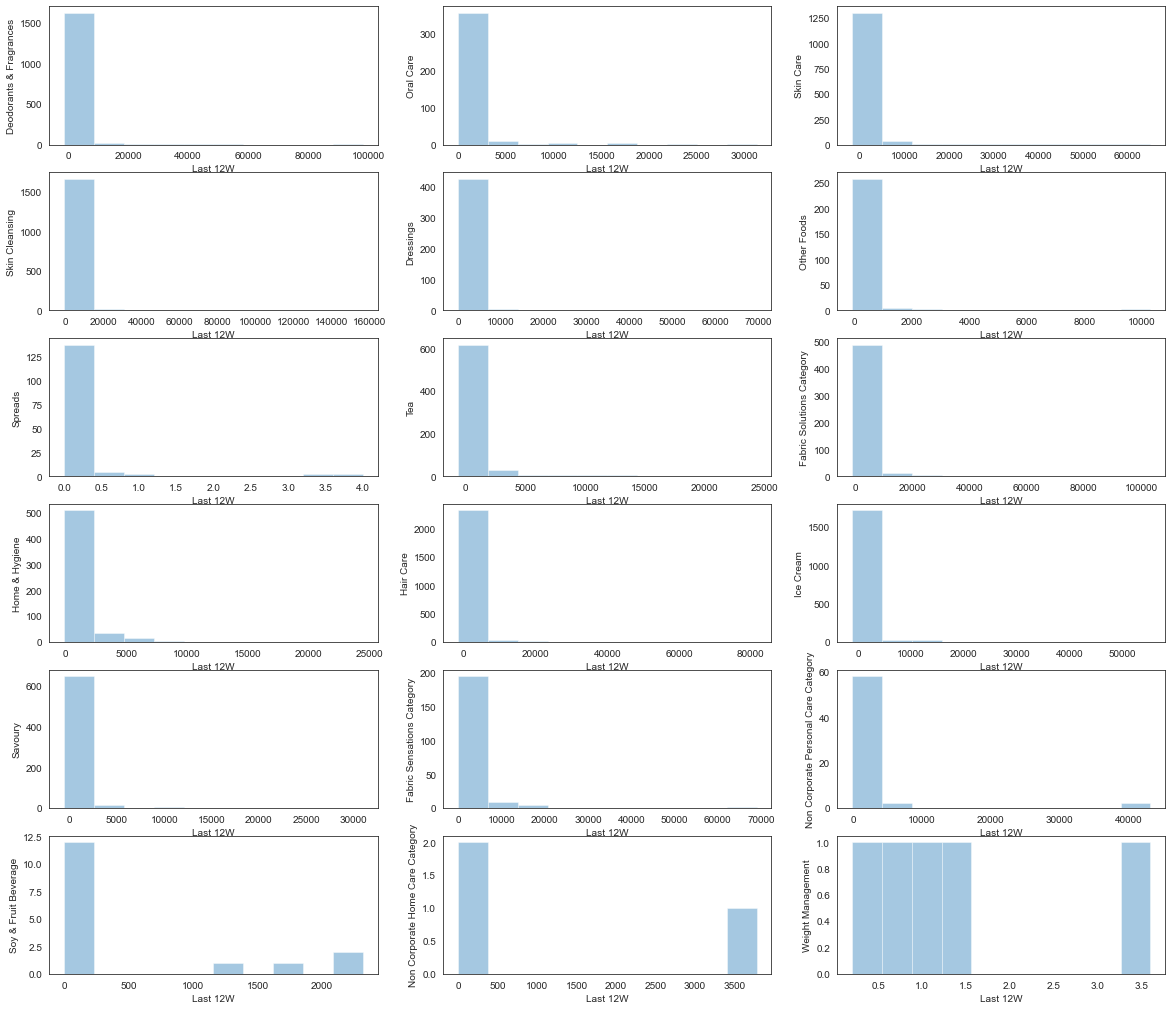

In [72]:
# Visualise each category through box plot
show_html("<h3>Ad Spend by category</h3>")
sixp_df_sos = sixp_df[sixp_df['Measure / KPI']== 'Ad Spend']
cat = sixp_df_sos['Category'].unique()

fig = plt.figure(figsize=(20,30))
n = 0
for i in cat:
    temp = sixp_df_sos[sixp_df_sos['Category']== i]
    ax = fig.add_subplot(10, 3, n+1)
    ax = sns.distplot(temp['Last 12W'], bins=10, kde=False)
    ax.set(ylabel=i)
    n+=1

Weight Management category has large amount of Ad spend for few brands. Similarly for Soy & Fruit Beverages and Non Corporate Home Care Cateegory has few brands which spends a large amount on Ad Spend.

If we take a KPI by category and by brand then it should follow the normal distribution. Let's analyse few random KPI by brand to see if this is true.

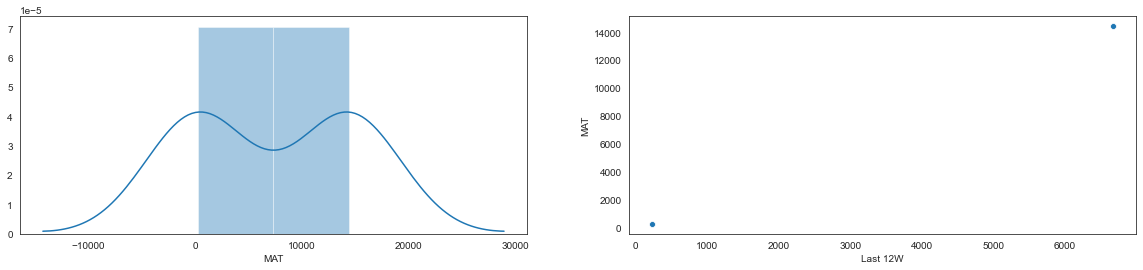

In [198]:
# SOS for Rexona Brand
fig = plt.figure(figsize=(20,4))

temp = sixp_df[sixp_df['Measure / KPI'] == 'Sos/Som']
temp = temp[temp['Local Brand']=='Rexona']

ax = fig.add_subplot(1,2,1)
ax = sns.distplot(temp['MAT'])

ax = fig.add_subplot(1,2,2)
ax = sns.scatterplot(x="Last 12W", y="MAT", data=temp)

plt.show()

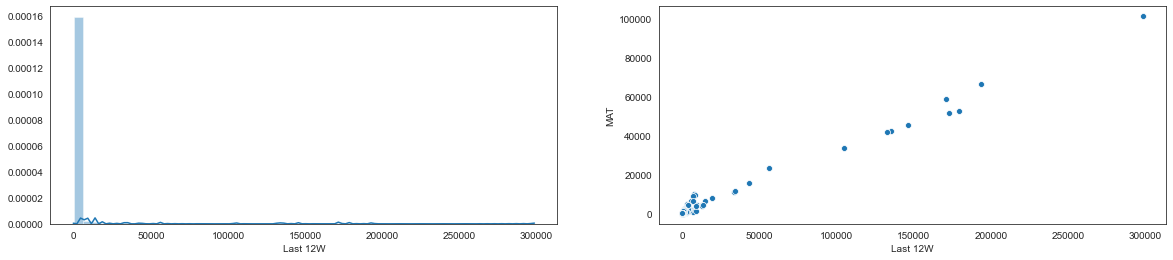

In [192]:
# SOS for Lipton Brand

temp = sixp_df[sixp_df['Category'] == 'Tea']
temp = temp[temp['Local Brand']=='Lipton']

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(1,2,1)
ax = sns.distplot(temp['Last 12W'])

ax = fig.add_subplot(1,2,2)
ax = sns.scatterplot(x="Last 12W", y="MAT", data=temp)

plt.show()

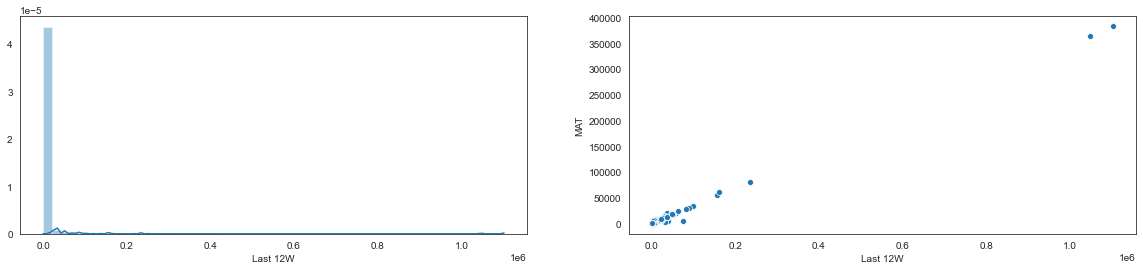

In [193]:
# SOS for Lipton Brand

temp = sixp_df[sixp_df['Category'] == 'Skin Cleansing']
temp = temp[temp['Local Brand']=='Dove']

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(1,2,1)
ax = sns.distplot(temp['Last 12W'])

ax = fig.add_subplot(1,2,2)
ax = sns.scatterplot(x="Last 12W", y="MAT", data=temp)

plt.show()

#### Correlation between numberical variables

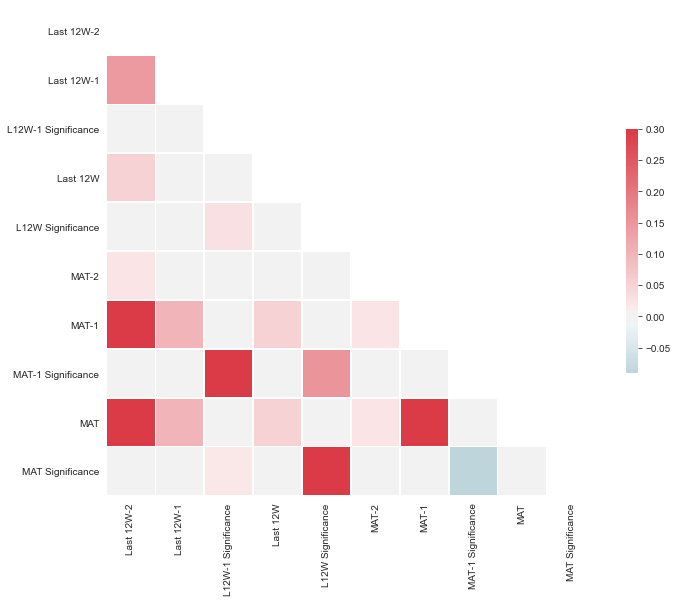

In [42]:
# Compute the correlation matrix
corr = sixp_df_num.corr()

# Set background color / chart style
sns.set_style(style = 'white')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Clustering / Segmentation of data to detect outliers

As evident from the above analysis, for some brands/ categories the KPI's tae extreme values. This mimght not be the anamolies rather the clusters within the market. e.g Luxury vs. mass market vs. premium products

In [257]:
# Label encode all the cagtegorical variables (ignoring NAN)
cols = sixp_df.columns
num_cols = sixp_df_num.columns
cat_cols = list(set(cols) - set(num_cols))

for col in cat_cols:
    le = LabelEncoder()
    sixp_df[col] = sixp_df[col].astype('str')
    sixp_df[col] = le.fit_transform(sixp_df[col])

# Normalize the data using standard scaler
scaler = StandardScaler()
sixp_df = scaler.fit_transform(sixp_df)

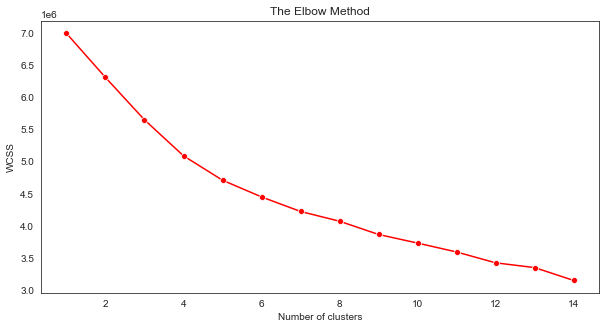

In [258]:
# Clustering and segmentation through K Means algorithm
# First we will determine the number of segments present in the data through Elbow method

# Replacing NAN with zeroes
sixp_df = np.nan_to_num(sixp_df)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(sixp_df)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
# Plotting the Elbow chart
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the above chart and few manual experiments with varying values of K, I choose K as 8.

In [271]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(sixp_df)

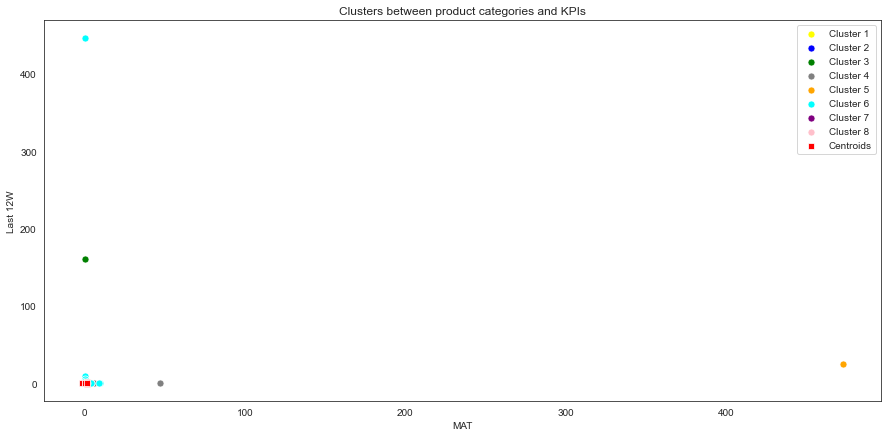

In [275]:
# Visualising the clusters for Last 12W and MAT

show_html("<h3>Outlier detection (Last 12W and MAT)</h3>")
plt.figure(figsize=(15,7))
sns.scatterplot(sixp_df[y_kmeans == 0, 30], sixp_df[y_kmeans == 0, 25], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(sixp_df[y_kmeans == 1, 30], sixp_df[y_kmeans == 1, 25], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(sixp_df[y_kmeans == 2, 30], sixp_df[y_kmeans == 2, 25], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(sixp_df[y_kmeans == 3, 30], sixp_df[y_kmeans == 3, 25], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(sixp_df[y_kmeans == 4, 30], sixp_df[y_kmeans == 4, 25], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(sixp_df[y_kmeans == 5, 30], sixp_df[y_kmeans == 5, 25], color = 'cyan', label = 'Cluster 6',s=50)
sns.scatterplot(sixp_df[y_kmeans == 6, 30], sixp_df[y_kmeans == 6, 25], color = 'purple', label = 'Cluster 7',s=50)
sns.scatterplot(sixp_df[y_kmeans == 7, 30], sixp_df[y_kmeans == 7, 25], color = 'pink', label = 'Cluster 8',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=30,marker=',')
plt.grid(False)
plt.title('Clusters between product categories and KPIs')
plt.xlabel('MAT')
plt.ylabel('Last 12W')
plt.legend()
plt.show()

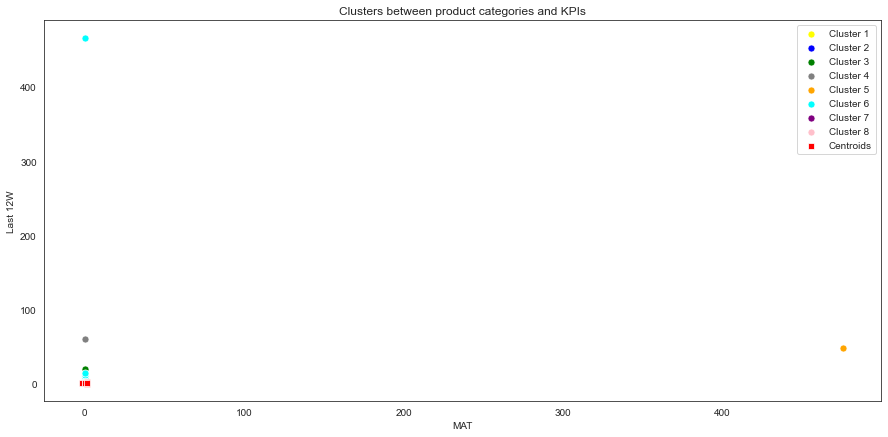

In [276]:
# Visualising the clusters for Last 12W-1 and MAT-1

show_html("<h3>Outlier detection (Last 12W-1 and MAT-1)</h3>")
plt.figure(figsize=(15,7))
sns.scatterplot(sixp_df[y_kmeans == 0, 28], sixp_df[y_kmeans == 0, 23], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(sixp_df[y_kmeans == 1, 28], sixp_df[y_kmeans == 1, 23], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(sixp_df[y_kmeans == 2, 28], sixp_df[y_kmeans == 2, 23], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(sixp_df[y_kmeans == 3, 28], sixp_df[y_kmeans == 3, 23], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(sixp_df[y_kmeans == 4, 28], sixp_df[y_kmeans == 4, 23], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(sixp_df[y_kmeans == 5, 28], sixp_df[y_kmeans == 5, 23], color = 'cyan', label = 'Cluster 6',s=50)
sns.scatterplot(sixp_df[y_kmeans == 6, 28], sixp_df[y_kmeans == 6, 23], color = 'purple', label = 'Cluster 7',s=50)
sns.scatterplot(sixp_df[y_kmeans == 7, 28], sixp_df[y_kmeans == 7, 23], color = 'pink', label = 'Cluster 8',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=30,marker=',')
plt.grid(False)
plt.title('Clusters between product categories and KPIs')
plt.xlabel('MAT')
plt.ylabel('Last 12W')
plt.legend()
plt.show()

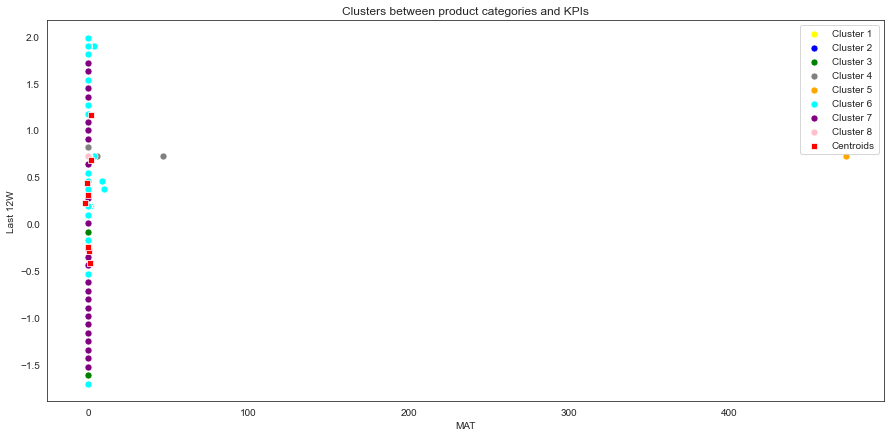

In [277]:
# Visualising the clusters for Last 12W-1 and MAT-1

show_html("<h3>Outlier detection (Measures / KPI vs. MAT)</h3>")
plt.figure(figsize=(15,7))
sns.scatterplot(sixp_df[y_kmeans == 0, 30], sixp_df[y_kmeans == 0, 15], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(sixp_df[y_kmeans == 1, 30], sixp_df[y_kmeans == 1, 15], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(sixp_df[y_kmeans == 2, 30], sixp_df[y_kmeans == 2, 15], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(sixp_df[y_kmeans == 3, 30], sixp_df[y_kmeans == 3, 15], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(sixp_df[y_kmeans == 4, 30], sixp_df[y_kmeans == 4, 15], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(sixp_df[y_kmeans == 5, 30], sixp_df[y_kmeans == 5, 15], color = 'cyan', label = 'Cluster 6',s=50)
sns.scatterplot(sixp_df[y_kmeans == 6, 30], sixp_df[y_kmeans == 6, 15], color = 'purple', label = 'Cluster 7',s=50)
sns.scatterplot(sixp_df[y_kmeans == 7, 30], sixp_df[y_kmeans == 7, 15], color = 'pink', label = 'Cluster 8',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=30,marker=',')
plt.grid(False)
plt.title('Clusters between product categories and KPIs')
plt.xlabel('MAT')
plt.ylabel('Last 12W')
plt.legend()
plt.show()

From series of combinations between varibles, it is evident that cluster 5 an 6 has outliers.

In [268]:
sixp_df[y_kmeans == 4, 30].shape

(1,)

Only 1 record is an outlier. Lets remove that cluster and re-iterate the process to further refine the data.

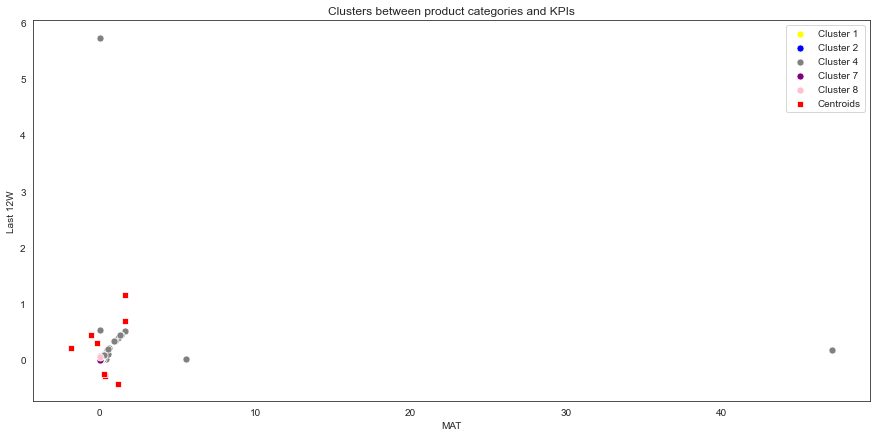

In [282]:
# Visualising the clusters for Last 12W and MAT

show_html("<h3>Outlier detection (Last 12W and MAT)</h3>")
plt.figure(figsize=(15,7))
sns.scatterplot(sixp_df[y_kmeans == 0, 30], sixp_df[y_kmeans == 0, 25], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(sixp_df[y_kmeans == 1, 30], sixp_df[y_kmeans == 1, 25], color = 'blue', label = 'Cluster 2',s=50)
#sns.scatterplot(sixp_df[y_kmeans == 2, 30], sixp_df[y_kmeans == 2, 25], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(sixp_df[y_kmeans == 3, 30], sixp_df[y_kmeans == 3, 25], color = 'grey', label = 'Cluster 4',s=50)
#sns.scatterplot(sixp_df[y_kmeans == 4, 30], sixp_df[y_kmeans == 4, 25], color = 'orange', label = 'Cluster 5',s=50)
#sns.scatterplot(sixp_df[y_kmeans == 5, 30], sixp_df[y_kmeans == 5, 25], color = 'cyan', label = 'Cluster 6',s=50)
sns.scatterplot(sixp_df[y_kmeans == 6, 30], sixp_df[y_kmeans == 6, 25], color = 'purple', label = 'Cluster 7',s=50)
sns.scatterplot(sixp_df[y_kmeans == 7, 30], sixp_df[y_kmeans == 7, 25], color = 'pink', label = 'Cluster 8',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=30,marker=',')
plt.grid(False)
plt.title('Clusters between product categories and KPIs')
plt.xlabel('MAT')
plt.ylabel('Last 12W')
plt.legend()
plt.show()

### Analysis of traditional outlier removal methods

Here I analyse the various algorithms such as modified z-score, IQR and standard deviation to treat the outlier.
for now I will simply calculate the number of outliers found in each case. If any of these methods comply with threshhold of 10% loss of data, then I will implement it in an Outlier ensemble

#### Standard Deviation

In [316]:
# Define a function to detect outliers

def out_std(df):
    cols = df.columns
    
    for item in cols:
        data = df[item].values
        # calculate summary statistics
        data_mean, data_std = np.mean(data), np.std(data)
        # identify outliers
        cut_off = data_std * 2
        lower, upper = data_mean - cut_off, data_mean + cut_off
        # identify outliers
        outliers = [x for x in data if x < lower or x > upper]
        print('Identified outliers in',item,'are: %d' % len(outliers))
    return

# Calling the function
out_std(sixp_df_num)

Identified outliers in Last 12W-2 are: 6
Identified outliers in Last 12W-1 are: 58
Identified outliers in L12W-1 Significance are: 0
Identified outliers in Last 12W are: 10
Identified outliers in L12W Significance are: 0
Identified outliers in MAT-2 are: 2
Identified outliers in MAT-1 are: 1
Identified outliers in MAT-1 Significance are: 0
Identified outliers in MAT are: 7
Identified outliers in MAT Significance are: 0


On 2 x STD the outliers found are not so significant to lose data when treated.

#### IQR

In [303]:
# Define a function to detect outliers

def out_IQR(df):
    cols = df.columns
    
    for item in cols:
        data = df[item].values
        # calculate interquartile range
        q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
        iqr = q75 - q25
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        # identify outliers
        outliers = [x for x in data if x < lower or x > upper]
        print('Identified outliers in',item,'are: %d' % len(outliers))
    return

# Calling the function
out_IQR(sixp_df_num)

Identified outliers in Last 12W-2 are: 21152
Identified outliers in Last 12W-1 are: 20682
Identified outliers in L12W-1 Significance are: 0
Identified outliers in Last 12W are: 20486
Identified outliers in L12W Significance are: 0
Identified outliers in MAT-2 are: 18741
Identified outliers in MAT-1 are: 18086
Identified outliers in MAT-1 Significance are: 0
Identified outliers in MAT are: 16931
Identified outliers in MAT Significance are: 0


IQR seems effective in identification of outliers and the loss in data will not be significant.

#### Modified Z-Score

In [315]:
# Define a function to detect outliers through z-score

def out_z(df):
    cols = df.columns
    
    for item in cols:
        # Getting item wise data
        data = df[item].values
        # Define the threshold
        threshold = 3.5
        # Using median instead of mean and standard deviatiom
        med_y = np.median(data)
        med_abs_y = np.median([np.abs(x - med_y) for x in data])
        # Calculating the z-score
        mod_z = np.abs([0.6745*(x - med_y)/med_abs_y for x in data])
        # Identify the outliers
        outliers = [x for x in mod_z if x > threshold]
        print('Identified outliers in',item,'are: %d' % len(outliers))
    return

out_z(sixp_df_num)

Identified outliers in Last 12W-2 are: 56033
Identified outliers in Last 12W-1 are: 41886
Identified outliers in L12W-1 Significance are: 0
Identified outliers in Last 12W are: 42497
Identified outliers in L12W Significance are: 0
Identified outliers in MAT-2 are: 80261
Identified outliers in MAT-1 are: 75613
Identified outliers in MAT-1 Significance are: 0
Identified outliers in MAT are: 62968
Identified outliers in MAT Significance are: 0


Modifie z-score base on the median has identified the outliers effectively however the data loss is significantly higher than IQR. We will plot the distribution to chec if the data is normally distributed and also if the data from all the categories as well as measures / KPIs are equally retained.

In above techniques, some of the KPIs may get removed altogether as those have large valoues compare to others. For instance, penetration vs. Sos/Som or TDM. Sos/Som and TDM have large values while penetration and market shares have smaller values.

### Inferential statistics

I will use inferential statistics to check the following in the datasets:
1. Is data normally distributed?
2. t-test
3. Generalised ESD test for outlier detection

## Conclusion:

#### Data inconsistencies:
Some of the variables, such as penetration seem to take the values between 0 to 200 which seems incorrect, assuming the penetration cannot exceed 100%. 
Similarly for the market share for some of  the categories seems to exceed 100%. 

The reason behind these errors can be due to incorrect handling of the data. Probably the user added these KPI rather than averaging them (assuming Last 12W mwans aggregate for last 12 weeks and Last 12w-1 means aggregate of 12 weeks for the prior period). 
The only way to correct these inconsistencies is to create a rule-based data mapping which will prohibit if the incorrect method is being employed for importing the data. e.g. If I add a record with penetration more than 100, I should get a prompt or a warning message.


#### Missing values and other sanity measures:
Significance related variables are quite easy to impute as these are generated based on period over period change in the other variable. It is a descrete variable which takes values between -1,0 and 1.

In case of categorical features, for instance, 'Category Gender' simply adding 'Unisex' would improve the overall quality of dataset for use in predictive algorithm.
While for some of the missing values such as Category Group, Category and Market, the business knowledge is required as it must be impute manually. If for a particular product category, some of these variables are already present in other samples, then it can be imputed easily (which is not the case in present scenario). In contrast, penetration.xlsx dataset has nulls for category of few samples but for the same products, category is presesnt in other samples. I will create a mapping for such instances to impute the values. This approach however wint apply if I'm adding a novel product without category or market. In that case user must input them as per the business requirements.


#### Outliers:
Outliers are present in the dataset. Particularly for Tea category and for the Sos/SOM as well as Retail Sales Growth metrics the extreme values are present. But due to multiple dimensions and features in the datasets, we used k means approach to identify the clusters in the data and find out the outliers. It clearly shows the presence of an outlier. The cluster 5 in the means approach is clearly an outlier. If it does not violate the threshhold of more than 10% of data loss, we can safely eliminate that cluster altogether. Also I will optimize the  means algorithm for effective outlier detection.

There is a possibility of loss of data if we employ IQR of standard deviation mesures to treat the ouliers. Very large number of observations fall beyond 2 standard deviations, and also more that 1.75 IQR, which might be meaningful for a particular measure. I will measure the amount of data loss if I employ one of the above method. If the loss in ata is not more that 10%, I will remove the outliers using IQR or STD.

Other outlier detection algorithms which I will employ (along with more robust application of k-means above) are:
1. Isolation Forest
2. Deep Autoencoders
3. One class Support Vector Machines
4. Eigen model - PCA
5. Probabilistic models including statisticsl t-tests, tail inequalities, EM algorithm (Expectation-Maximization)
6. LOCI (Local Correlation Integral)
7. DBSCAN

In the outlier analysis, I will implement ROC AUC to evaluate outlier detection.